In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [2]:
df=pd.read_csv("/content/50_Startups.csv")


In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


(50, 5)

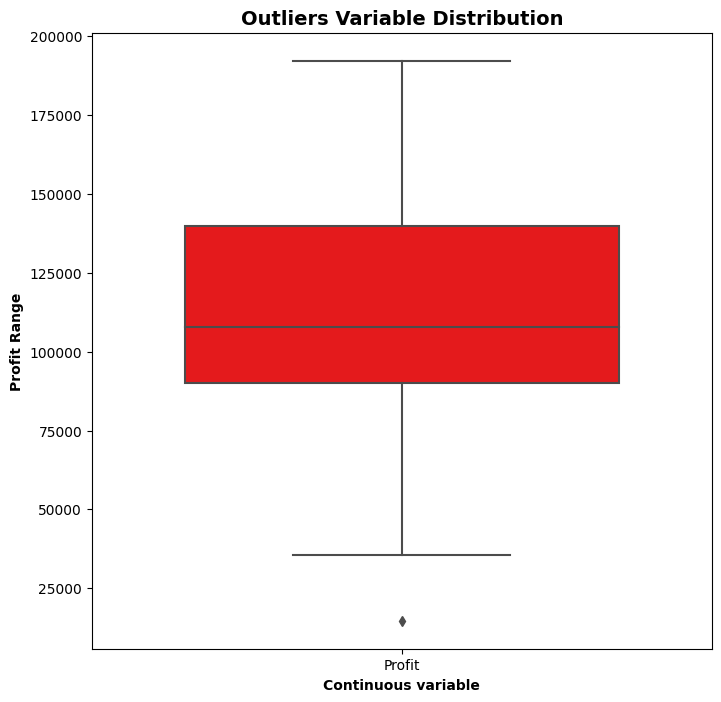

In [5]:
# Outlier Analysis of target variable with maximum amount of inconsistency
outliers=["Profit"]
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=df[outliers],orient='v',palette="Set1",whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Profit Range",fontweight='bold')
plt.xlabel("Continuous variable",fontweight='bold')
df.shape

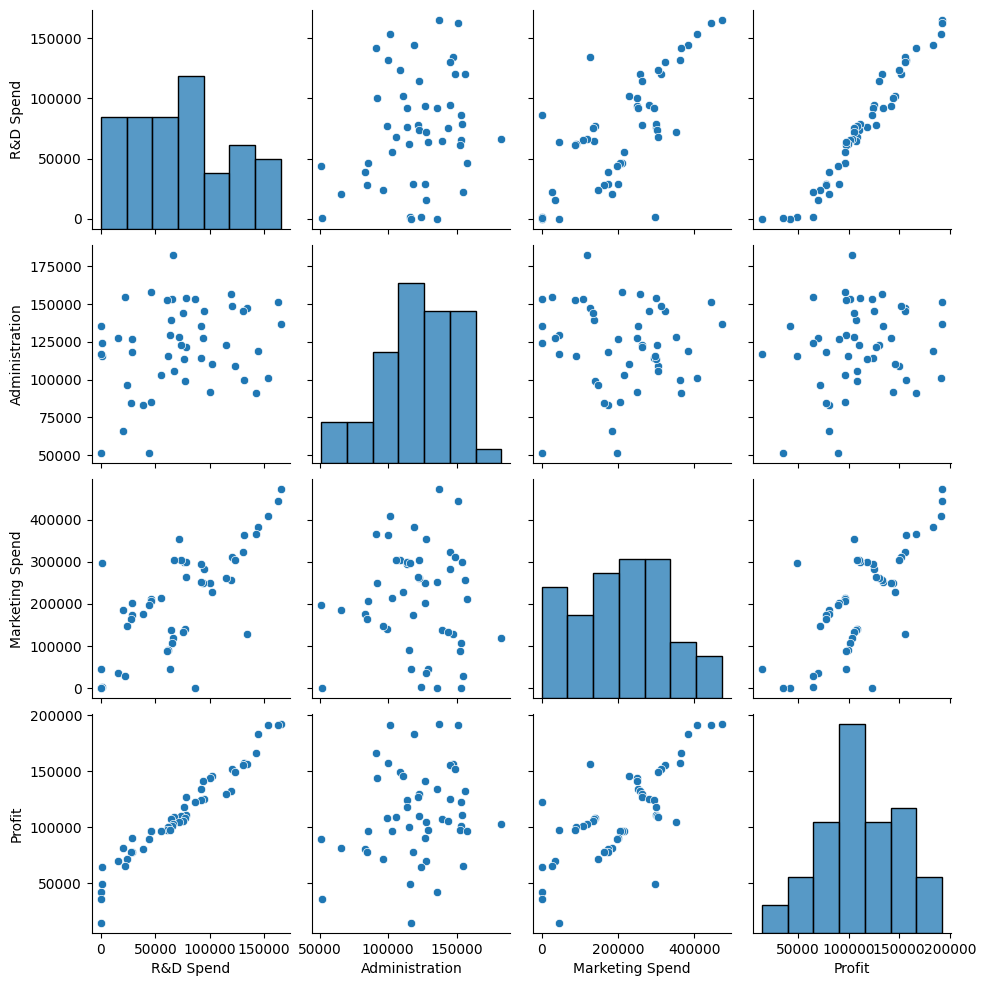

In [6]:

sns.pairplot(df)

In [7]:
# Check for duplicates
df.loc[df.duplicated()]


,R&D Spend,Administration,Marketing Spend,State,Profit


<ipython-input-8-654f6661b9ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: title={'center': 'Profit Distribution Plot'}, xlabel='Profit', ylabel='Density'>

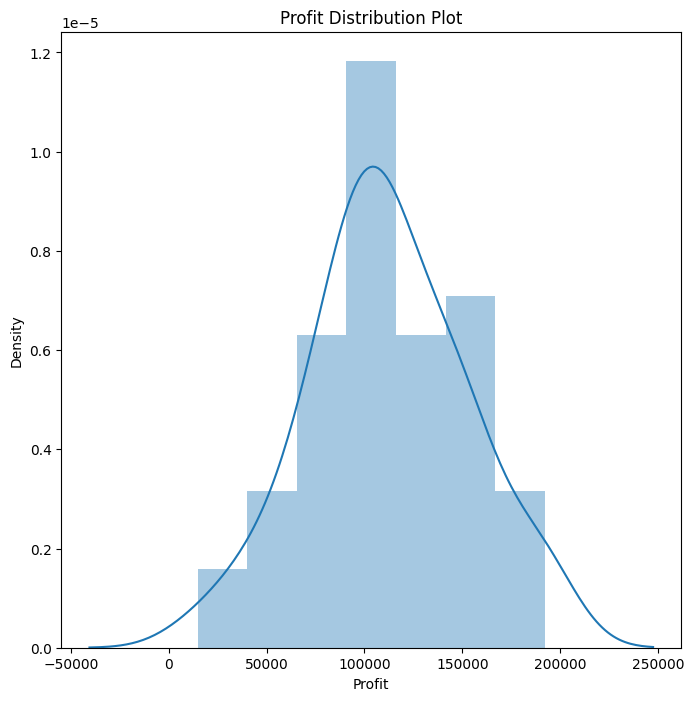

In [8]:
plt.figure(figsize=(8,8))
plt.title('Profit Distribution Plot')
sns.distplot(df['Profit'])

## Correlation Matrix

In [9]:
corr=df.corr()

<ipython-input-9-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

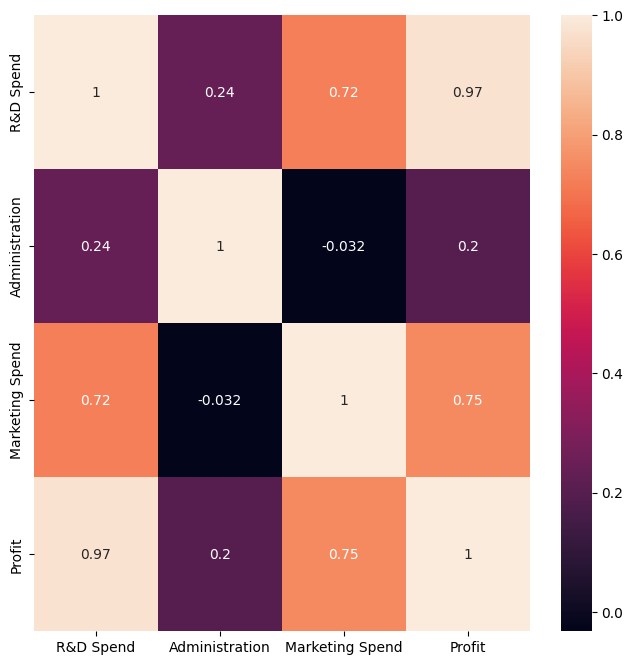

In [10]:
sns.heatmap(corr,annot=True)


In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Regression model

In [12]:
df = pd.get_dummies(df,columns=['State'])

In [13]:
X=df[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida','State_New York']]
Y=df[["Profit"]]

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
model=sm.OLS(Y,X).fit()
predictions= model.predict(X)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.34e-27
Time:                        17:15:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R sq value is good hence the model can be accepted but some variable has high p value due to which there is multicollinearity issue in this model**

## Multicollinearity

### lets find cooks distance

In [17]:
inf1=model.get_influence()

In [18]:
summ_df=inf1.summary_frame()


In [19]:
summ_df.sort_values('cooks_d',ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


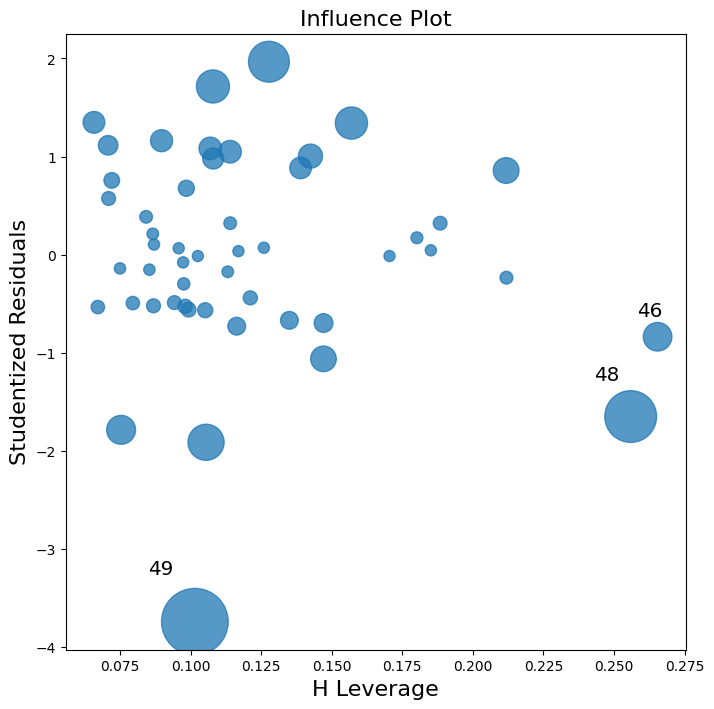

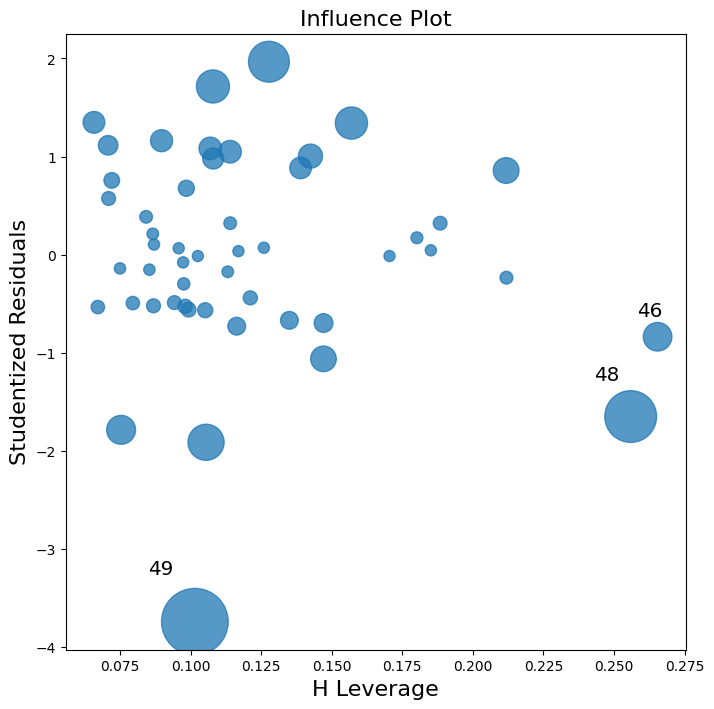

In [20]:
inf1.plot_influence()

## Find VIF(Variance inflation facvtor)

In [21]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


Administration has lowest VIF hence we need to discard this to impore model

In [22]:
new_df=df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [23]:
new_model=sm.OLS(Y,new_df).fit()
new_predictions=new_model.predict(new_df)

In [24]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           9.72e-29
Time:                        17:15:56   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

In [25]:
new_df=df.drop(df.index[[48,49]])

In [26]:
new_X=new_df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [27]:
new_Y=new_df[["Profit"]]

In [28]:
final_model= sm.OLS(new_Y,new_X).fit()
predictions=final_model.predict(new_X)

In [29]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.02e-29
Time:                        17:15:56   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We will try to improve R2 more

# Sq Root transformation of X

In [30]:

X_sqrt= np.sqrt(new_df[['R&D Spend','Marketing Spend','State_California','State_New York']])


In [31]:
i_model=sm.OLS(new_Y,X_sqrt).fit()

In [32]:
i_prediction=i_model.predict(X_sqrt)

In [33]:
i_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              939.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                    5.66e-42
Time:                        17:15:56   Log-Likelihood:                         -522.95
No. Observations:                  48   AIC:                                      1054.
Df Residuals:                      44   BIC:                                      1061.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          359.6844     25.836     13.922      0.000     307.615     411.753
Marketing Spend     36.7385     14.589      2.518      0.016       7.336      66.141
State_California  6905.6218   4308.683      1.603      0.116   -1777.959    1.56e+04
State_New York    6898.4549   4466.383      1.545      0.130   -2102.948    1.59e+04
==============================================================================
Omnibus:                       14.760   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.713
Skew:                           1.173   Prob(JB):                     0.000235
Kurtosis:                       4.689   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root transformation of Y

In [34]:
Y_sqrt=np.sqrt(new_df["Profit"])

In [35]:
ii_model=sm.OLS(Y_sqrt,new_X).fit()

In [36]:
ii_prediction=ii_model.predict(new_X)

In [37]:
ii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.68e-28
Time:                        17:15:56   Log-Likelihood:                -185.87
No. Observations:                  48   AIC:                             381.7
Df Residuals:                      43   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   5.64e-05     20.622      0.000       0.001       0.001
Marketing Spend   2.473e-05   2.13e-05      1.159      0.253   -1.83e-05    6.78e-05
State_California   241.0032      4.390     54.894      0.000     232.149     249.857
State_Florida      240.7325      4.986     48.283      0.000     230.678     250.787
State_New York     240.9886      4.756     50.669      0.000     231.397     250.580
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.371
Skew:                          -0.532   Prob(JB):                        0.185
Kurtosis:                       3.745   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root transformation of X & Y


In [38]:
iii_model=sm.OLS(Y_sqrt,X_sqrt).fit()

In [39]:
iii_prediction=iii_model.predict(X_sqrt)

In [40]:
iii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              462.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                    2.51e-35
Time:                        17:15:56   Log-Likelihood:                         -257.60
No. Observations:                  48   AIC:                                      523.2
Df Residuals:                      44   BIC:                                      530.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7386      0.103      7.196      0.000       0.532       0.945
Marketing Spend      0.2076      0.058      3.581      0.001       0.091       0.324
State_California    61.2557     17.118      3.579      0.001      26.757      95.754
State_New York      55.2471     17.744      3.114      0.003      19.486      91.008
==============================================================================
Omnibus:                        8.004   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.007
Skew:                           0.851   Prob(JB):                       0.0301
Kurtosis:                       3.778   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## i_model has best R2 value hence we will use that model